In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Implement Watershed and Graph cut algorithms for image segmentation.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/machine-vision/water_coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
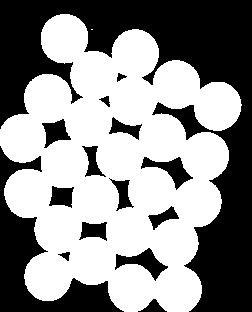

In [ ]:
thresh

In [ ]:
ret

16.778297233581544

In [ ]:

kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv.dilate(opening,kernel,iterations=3)

dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

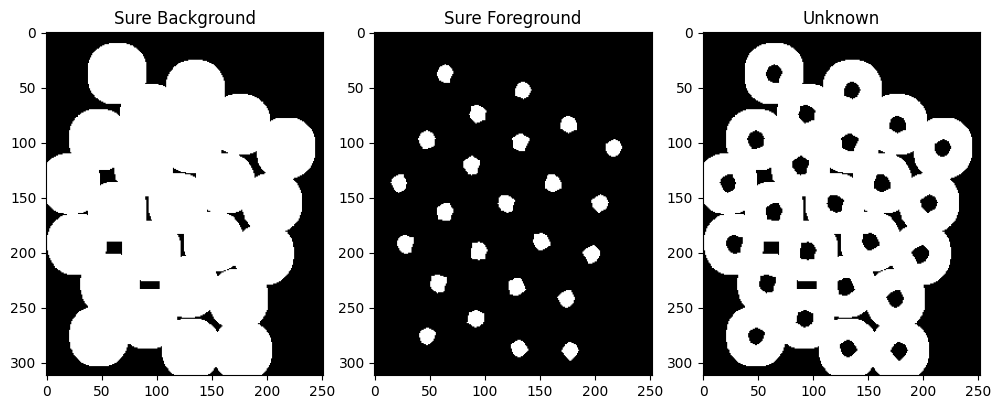

In [ ]:

fig, axs = plt.subplots(1,3, figsize=(10, 15))

axs[0].imshow(sure_bg, cmap='gray')
axs[0].set_title('Sure Background')

axs[1].imshow(sure_fg, cmap='gray')
axs[1].set_title('Sure Foreground')

axs[2].imshow(unknown, cmap='gray')
axs[2].set_title('Unknown')

plt.tight_layout()

plt.show()

In [ ]:

ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

In [ ]:
ret

25

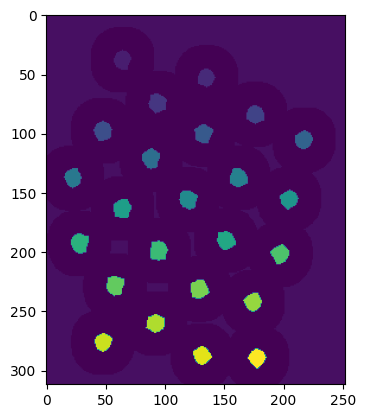

In [ ]:
plt.imshow(markers)

In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

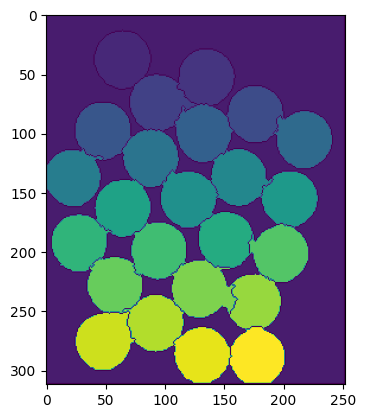

In [ ]:
plt.imshow(markers)

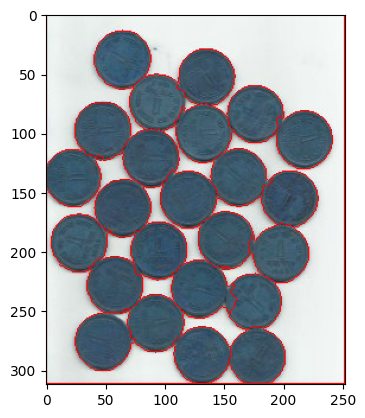

In [ ]:
plt.imshow(img)

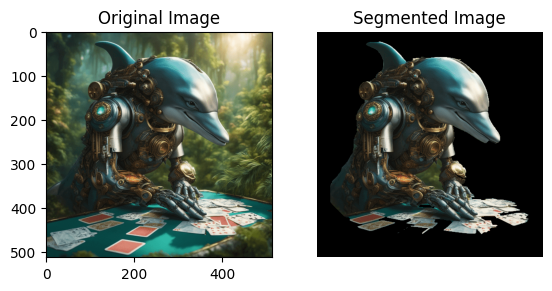

In [ ]:
import cv2

image = cv2.imread('/content/drive/MyDrive/machine-vision/cyberpunkdolphin.png')

mask = np.zeros(image.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

rectangle = (30, 10, 450, 450)

cv2.grabCut(image, mask, rectangle,
			backgroundModel, foregroundModel,
			3, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

image_segmented = image * mask2[:, :, np.newaxis]

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
